In [ ]:
# Install required packages
%pip install --upgrade --quiet pandas
%pip install --upgrade --quiet natural_pdf
%pip install --upgrade --quiet tqdm


In [ ]:
# Download and extract data files
import os
import urllib.request
import zipfile

url = 'https://github.com/jsoma/2025-ds-dojo/raw/main/docs/02-pandas/02-estats-pandas-data.zip'
print(f'Downloading data from {url}...')
urllib.request.urlretrieve(url, '02-estats-pandas-data.zip')

print('Extracting 02-estats-pandas-data.zip...')
with zipfile.ZipFile('02-estats-pandas-data.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

os.remove('02-estats-pandas-data.zip')
print('✓ Data files extracted!')

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("estat-population.csv")
df.head()

,YEAR,AREA,/ITEMS,A1302_Total population (15-64)[person],A1303_Total population (65 and over)[person]
0,2022,Hokkaido,NaN,"2,924,000","1,686,000"
1,2022,Aomori-ken,NaN,"663,000","419,000"
2,2022,Iwate-ken,NaN,"648,000","408,000"
3,2022,Miyagi-ken,NaN,"1,363,000","659,000"
4,2022,Akita-ken,NaN,"484,000","359,000"


Check the data types. What's wrong with the **Total population** columns?

In [20]:
df.dtypes

YEAR                                              int64
AREA                                             object
/ITEMS                                          float64
A1302_Total population (15-64)[person]           object
A1303_Total population (65 and over)[person]     object
dtype: object

It's because the columns are `2,924,000`. How can we correct that? There are two ways – the best approach involves fixing it while you're reading in the data.

In [21]:
df = pd.read_csv("estat-population.csv", thousands=',')
df.head()

,YEAR,AREA,/ITEMS,A1302_Total population (15-64)[person],A1303_Total population (65 and over)[person]
0,2022,Hokkaido,NaN,2924000,1686000
1,2022,Aomori-ken,NaN,663000,419000
2,2022,Iwate-ken,NaN,648000,408000
3,2022,Miyagi-ken,NaN,1363000,659000
4,2022,Akita-ken,NaN,484000,359000


The long column name of `A1302_Total population (15-64)[person]` is awkward and difficult to type, so let's rename the columns to be:

- `pop_15-64`
- `pop_65-over`

In [22]:
df = df.rename(columns={
    'A1302_Total population (15-64)[person]': 'pop_15-64',
    'A1303_Total population (65 and over)[person]': 'pop_65-over'
})
df.head()

,YEAR,AREA,/ITEMS,pop_15-64,pop_65-over
0,2022,Hokkaido,NaN,2924000,1686000
1,2022,Aomori-ken,NaN,663000,419000
2,2022,Iwate-ken,NaN,648000,408000
3,2022,Miyagi-ken,NaN,1363000,659000
4,2022,Akita-ken,NaN,484000,359000


What prefecture has the largest number of 65+ population?

In [23]:
(
    df
    .sort_values(by='pop_65-over', ascending=False)
    .head()
)

,YEAR,AREA,/ITEMS,pop_15-64,pop_65-over
153,2019,Tokyo-to,NaN,9158000,3209000
59,2021,Tokyo-to,NaN,9255000,3202000
12,2022,Tokyo-to,NaN,9301000,3202000
200,2018,Tokyo-to,NaN,9084000,3189000
247,2017,Tokyo-to,NaN,9021000,3160000


Let's only look at **2019 data**. Filter your dataset for 2019, and confirm it has 47 rows.

In [24]:
df = df[df['YEAR'] == 2019]
df.shape

(47, 5)

Now find the prefecture with the largest number of 65+ population.

In [25]:
(
    df
    .sort_values(by='pop_65-over', ascending=False)
    .head()
)

,YEAR,AREA,/ITEMS,pop_15-64,pop_65-over
153,2019,Tokyo-to,NaN,9158000,3209000
167,2019,Osaka-fu,NaN,5333000,2434000
154,2019,Kanagawa-ken,NaN,5771000,2329000
151,2019,Saitama-ken,NaN,4508000,1961000
163,2019,Aichi-ken,NaN,4669000,1892000


Tokyo is just *big*, though, so we should probably adjust this to be **based on percentage**.

Create a new column called `total` that is the total population.

In [26]:
df['total'] = df['pop_15-64'] + df['pop_65-over']
df.head()

,YEAR,AREA,/ITEMS,pop_15-64,pop_65-over,total
141,2019,Hokkaido,NaN,3012000,1673000,4685000
142,2019,Aomori-ken,NaN,699000,415000,1114000
143,2019,Iwate-ken,NaN,684000,406000,1090000
144,2019,Miyagi-ken,NaN,1382000,652000,2034000
145,2019,Akita-ken,NaN,512000,359000,871000


Create two new columns for the percentage of the prefecture that is 15-64 and 65 and over. Name them `pct_15-64` and `pct_65-over`. 

> It's fine to keep the percentage as 0.0-1.0, but you can make it 0-100 if you'd really like!

In [27]:
df['pct_15-64'] = df['pop_15-64'] / df['total']
df['pct_65-over'] = df['pop_65-over'] / df['total']
df.head()

,YEAR,AREA,/ITEMS,pop_15-64,pop_65-over,total,pct_15-64,pct_65-over
141,2019,Hokkaido,NaN,3012000,1673000,4685000,0.642903,0.357097
142,2019,Aomori-ken,NaN,699000,415000,1114000,0.627469,0.372531
143,2019,Iwate-ken,NaN,684000,406000,1090000,0.627523,0.372477
144,2019,Miyagi-ken,NaN,1382000,652000,2034000,0.679449,0.320551
145,2019,Akita-ken,NaN,512000,359000,871000,0.587830,0.412170


What prefecture has the highest population of 65+ population?

In [28]:
df.sort_values(by='pct_65-over', ascending=False).head()

,YEAR,AREA,/ITEMS,pop_15-64,pop_65-over,total,pct_15-64,pct_65-over
145,2019,Akita-ken,NaN,512000,359000,871000,0.587830,0.412170
179,2019,Kochi-ken,NaN,375000,246000,621000,0.603865,0.396135
172,2019,Shimane-ken,NaN,360000,231000,591000,0.609137,0.390863
175,2019,Yamaguchi-ken,NaN,735000,466000,1201000,0.611990,0.388010
176,2019,Tokushima-ken,NaN,402000,245000,647000,0.621329,0.378671


Let's make a **graph** of the percentage of each prefecture that is 65 and over.

<Axes: ylabel='AREA'>

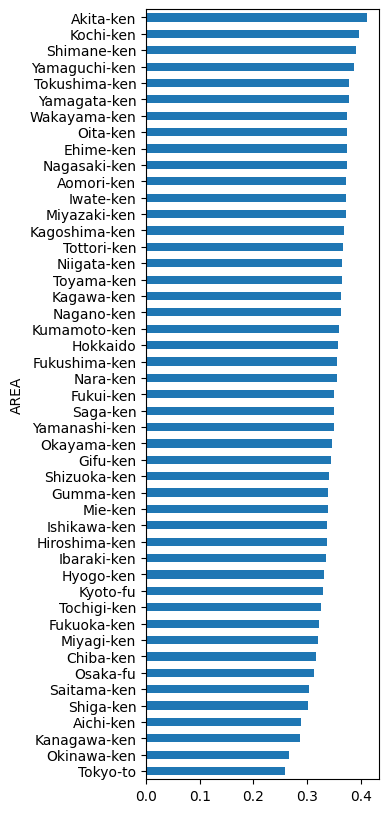

In [29]:
(
    df
    .sort_values(
        by='pct_65-over',
        ascending=True
    )
    .plot(
        kind='barh',
        y='pct_65-over',
        x='AREA',
        figsize=(3,10),
        legend=False
    )
)

Save the dataframe as `population-with-totals.csv`. **Check the file after you save it to make sure it doesn't have a weird empty column.**

In [30]:
df.to_csv("population-with-totals.csv", index=False)

## Bonus: Prefecture names in kana

Right now the content is **only in romaji**. It would be nice to have it in kana instead! I've created `prefecture_names.csv` with a mapping between the two.

Try to read it in: there's a issue you'll need to solve before it will work! You probably want to call it `df_pref`  so it doesn't overwrite your previous dataframe.

In [31]:
df_pref = pd.read_csv("prefecture_names.csv", encoding='shift-jis')
df_pref.head()

,name_ro,name_jp
0,Hokkaido,北海道
1,Aomori-ken,青森県
2,Iwate-ken,岩手県
3,Miyagi-ken,宮城県
4,Akita-ken,秋田県


Merge your dataframes together, saving it as `merged`. Then graph again with the `name_jp` column.

In [32]:
merged = df.merge(df_pref, left_on='AREA', right_on='name_ro')
merged.head()

,YEAR,AREA,/ITEMS,pop_15-64,pop_65-over,total,pct_15-64,pct_65-over,name_ro,name_jp
0,2019,Hokkaido,NaN,3012000,1673000,4685000,0.642903,0.357097,Hokkaido,北海道
1,2019,Aomori-ken,NaN,699000,415000,1114000,0.627469,0.372531,Aomori-ken,青森県
2,2019,Iwate-ken,NaN,684000,406000,1090000,0.627523,0.372477,Iwate-ken,岩手県
3,2019,Miyagi-ken,NaN,1382000,652000,2034000,0.679449,0.320551,Miyagi-ken,宮城県
4,2019,Akita-ken,NaN,512000,359000,871000,0.587830,0.412170,Akita-ken,秋田県


The plot might not work because it uses non-Latin characters! You'll need to find a font that works.

<Axes: ylabel='name_jp'>

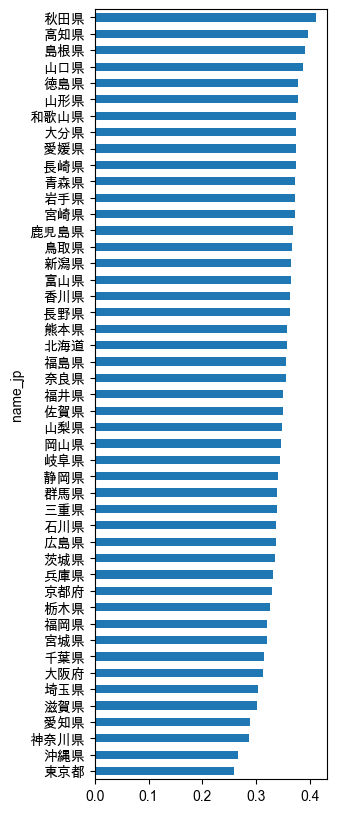

In [56]:
from matplotlib import rcParams

rcParams['font.family'] = 'Arial Unicode MS' 

(
    merged
    .sort_values(
        by='pct_65-over',
        ascending=True
    )
    .plot(
        kind='barh',
        y='pct_65-over',
        x='name_jp',
        figsize=(3,10),
        legend=False
    )
)

Maybe you'll need to list fonts?

In [55]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))


## Bonus: Interactive visualization

Read in the file again. In one cell, be sure to:

- Take care of the thousands, making sure the population is read in as numbers
- Rename the columns as we did above
- Create the `total` column
- Create the percentage columns

But this time we will NOT remove the pre-2022 data.

In [52]:
df = pd.read_csv("estat-population.csv", thousands=',')

df = df.rename(columns={
    'A1302_Total population (15-64)[person]': 'pop_15-64',
    'A1303_Total population (65 and over)[person]': 'pop_65-over'
})

df['total'] = df['pop_15-64'] + df['pop_65-over']
df['pct_15-64'] = df['pop_15-64'] / df['total']
df['pct_65-over'] = df['pop_65-over'] / df['total']

df.head()

,YEAR,AREA,/ITEMS,pop_15-64,pop_65-over,total,pct_15-64,pct_65-over
0,2022,Hokkaido,NaN,2924000,1686000,4610000,0.634273,0.365727
1,2022,Aomori-ken,NaN,663000,419000,1082000,0.612754,0.387246
2,2022,Iwate-ken,NaN,648000,408000,1056000,0.613636,0.386364
3,2022,Miyagi-ken,NaN,1363000,659000,2022000,0.674085,0.325915
4,2022,Akita-ken,NaN,484000,359000,843000,0.574140,0.425860


Confirm you have 2,256 rows.

In [55]:
df.shape

(2256, 8)

Use ChatGPT to create a graphic to show you each prefecture's population over time. **On Thursday we will look at what the best approach to visualizing this data might be.**

In [59]:
import altair as alt

alt.Chart(df).mark_line().encode(
    x='YEAR:O',  # Treat YEAR as ordinal for line plot
    y='pct_65-over:Q',  # Quantitative for percentage
    color='AREA:N',  # Color by AREA (categorical)
    tooltip=['AREA', 'YEAR', 'pct_65-over']  # Tooltip to show details on hover
).properties(
    title='Percentage of Population 65+ by Area Over Time'
).interactive()  # Enable zoom and pan

alt.Chart(...)

In [61]:
highlight = alt.selection_single(
    fields=['AREA'],  # Selection is based on AREA
    nearest=True,  # Select the nearest line to the hover
    on='mouseover',  # Selection activates on hover
    empty='none'  # If no line is hovered, nothing is selected
)

base = alt.Chart(df).mark_line().encode(
    x='YEAR:O',
    y='pct_65-over:Q',
    color=alt.condition(highlight, 'AREA:N', alt.value('lightgray')),  # Highlight hovered line
    size=alt.condition(highlight, alt.value(3), alt.value(1)),  # Thicker line for the highlighted area
    tooltip=['AREA', 'YEAR', 'pct_65-over']
)

# Add points to make the hover interaction easier
points = base.mark_point().encode(
    opacity=alt.value(0)  # Invisible points, only for interaction purposes
).add_selection(
    highlight
)

# Combine the lines and points
chart = (base + points).properties(
    title='Percentage of Population 65+ by Area Over Time'
).interactive()

# Show the chart
chart

/Users/soma/.pyenv/versions/3.10.13/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Users/soma/.pyenv/versions/3.10.13/lib/python3.10/site-packages/altair/vegalite/v5/api.py:398: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
/Users/soma/.pyenv/versions/3.10.13/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.LayerChart(...)

In [66]:
base = alt.Chart(df).mark_line().encode(
    x='YEAR:O',
    y='pct_65-over:Q',
    tooltip=['AREA', 'YEAR', 'pct_65-over']
).properties(
    width=150,  # Set the width of each chart
    height=100  # Set the height of each chart
)

# Facet the chart into a grid where each AREA gets its own subplot
grid = base.facet(
    facet='AREA:N',  # Facet by AREA (each AREA gets a chart)
    columns=4  # Specify the number of columns in the grid
).properties(
    title='Percentage of Population 65+ by Area Over Time'
)  # Interactive zoom and pan

# Show the chart
grid


alt.FacetChart(...)

In [68]:
df['pct_change'] = df.groupby('AREA')['pct_65-over'].pct_change()  # Calculate percentage change

In [69]:
base = alt.Chart(df).mark_line().encode(
    x='YEAR:O',
    y='pct_change:Q',  # Use pct_change instead of pct_65-over
    tooltip=['AREA', 'YEAR', 'pct_change']
).properties(
    width=150,  # Set the width of each chart
    height=100  # Set the height of each chart
)

# Facet the chart into a grid where each AREA gets its own subplot
grid = base.facet(
    facet='AREA:N',  # Facet by AREA (each AREA gets a chart)
    columns=4  # Specify the number of columns in the grid
).properties(
    title='Percentage of Population 65+ by Area Over Time'
)  # Interactive zoom and pan

# Show the chart
grid

alt.FacetChart(...)